# Module 4. Evaluation Metrics for Classification.
In the previous session we trained a model for predicting churn. How do we know if it's good?

## 4.1 Evaluation metrics: session overview.
- Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
- https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('../03-classification/data/data.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [5]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [6]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

## 4.2 Accuracy and dummy model.
- Evaluate the model on differente thresholds.
- Check the accuracy of dummy baselines.
Metric - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [8]:
len(y_val)

1409

In [9]:
(y_val == churn_decision).sum()

np.int64(1129)

In [10]:
1129 / 1409

0.801277501774308

In [11]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print(f"{t:.2f} {score:.3f}")
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


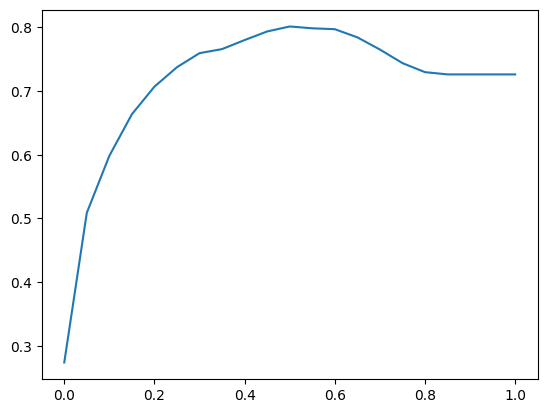

In [12]:
plt.plot(thresholds, scores)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_val, y_pred >= 0.5)

0.801277501774308

In [15]:
scores_ = []

for t in thresholds:
    score= accuracy_score(y_val, y_pred >= t)
    print(f"{t:.2f} {score:.3f}")
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [16]:
from collections import Counter

In [17]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

In [18]:
Counter(y_val)

Counter({np.int64(0): 1023, np.int64(1): 386})

In [19]:
# Percentage of churning
y_val.mean()

np.float64(0.2739531582682754)

In [20]:
# Percentage not churning
1 - y_val.mean()

np.float64(0.7260468417317246)

## 4.3 Confusion table.
- Different types of error and correct decisions.
- Arraging them in a table.

In [21]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [22]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [23]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
tp, tn

(np.int64(214), np.int64(915))

In [24]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
fp, fn

(np.int64(108), np.int64(172))

In [25]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[915, 108],
       [172, 214]])

In [26]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.08],
       [0.12, 0.15]])

## 4.4 Precision and recall

In [27]:
(tp + tn) / (tp + tn + fp + fn)

np.float64(0.801277501774308)

In [28]:
p = tp / (tp + fp)
p

np.float64(0.6645962732919255)

In [29]:
tp + fp

np.int64(322)

In [30]:
r = tp / (tp + fn)
r

np.float64(0.5544041450777202)

## 4.5 ROC Curves
TPR and FRP.

In [31]:
tpr = tp / (tp + fn)
tpr

np.float64(0.5544041450777202)

In [32]:
fpr = fp /(fp + tn)
fpr

np.float64(0.10557184750733138)

In [33]:
scores = []

thresholds = np.linspace(0, 1, 101)
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [34]:
scores

[(np.float64(0.0), np.int64(386), np.int64(1023), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(903), np.int64(1), np.int64(120)),
 (np.float64(0.02), np.int64(384), np.int64(812), np.int64(2), np.int64(211)),
 (np.float64(0.03), np.int64(382), np.int64(753), np.int64(4), np.int64(270)),
 (np.float64(0.04), np.int64(380), np.int64(708), np.int64(6), np.int64(315)),
 (np.float64(0.05), np.int64(378), np.int64(684), np.int64(8), np.int64(339)),
 (np.float64(0.06), np.int64(376), np.int64(660), np.int64(10), np.int64(363)),
 (np.float64(0.07), np.int64(374), np.int64(631), np.int64(12), np.int64(392)),
 (np.float64(0.08), np.int64(371), np.int64(601), np.int64(15), np.int64(422)),
 (np.float64(0.09), np.int64(369), np.int64(569), np.int64(17), np.int64(454)),
 (np.float64(0.1), np.int64(367), np.int64(547), np.int64(19), np.int64(476)),
 (np.float64(0.11), np.int64(365), np.int64(520), np.int64(21), np.int64(503)),
 (np.float64(0.12), np.int64(363), np.int64(503),

In [35]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,367,547,19,476
20,0.2,334,361,52,662
30,0.3,291,244,95,779
40,0.4,253,177,133,846
50,0.5,214,108,172,915
60,0.6,153,53,233,970
70,0.7,69,14,317,1009
80,0.8,5,0,381,1023
90,0.9,0,0,386,1023


In [36]:
df_scores["tpr"] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores["fpr"] = df_scores.fp / (df_scores.fp + df_scores.tn)
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,367,547,19,476,0.950777,0.534702
20,0.2,334,361,52,662,0.865285,0.352884
30,0.3,291,244,95,779,0.753886,0.238514
40,0.4,253,177,133,846,0.655440,0.173021
50,0.5,214,108,172,915,0.554404,0.105572
60,0.6,153,53,233,970,0.396373,0.051808
70,0.7,69,14,317,1009,0.178756,0.013685
80,0.8,5,0,381,1023,0.012953,0.000000
90,0.9,0,0,386,1023,0.000000,0.000000


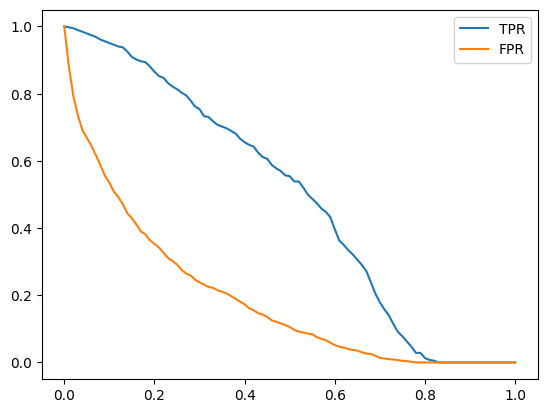

In [37]:
plt.plot(df_scores.threshold, df_scores['tpr'], label="TPR")
plt.plot(df_scores.threshold, df_scores['fpr'], label="FPR")
plt.legend()

### Random model

In [38]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [39]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [40]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
            
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores["tpr"] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores["fpr"] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

    

In [41]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


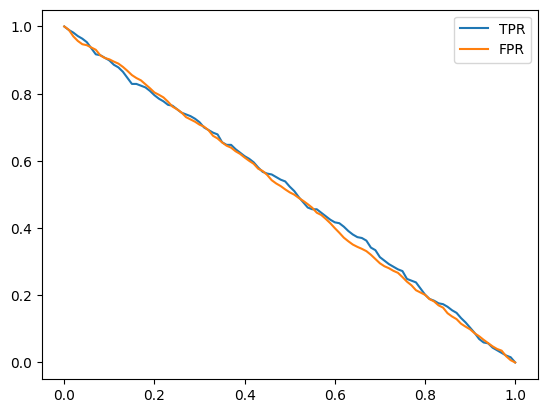

In [42]:
plt.plot(df_rand.threshold, df_rand['tpr'], label="TPR")
plt.plot(df_rand.threshold, df_rand['fpr'], label="FPR")
plt.legend()

### Ideal model

In [43]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [44]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [45]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [46]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [47]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [48]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

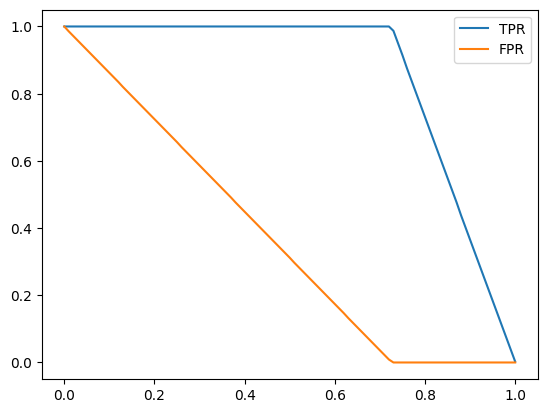

In [49]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label="TPR")
plt.plot(df_ideal.threshold, df_ideal['fpr'], label="FPR")
plt.legend()

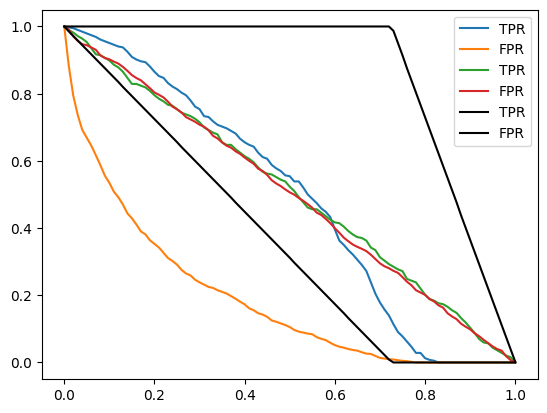

In [50]:
plt.plot(df_scores.threshold, df_scores['tpr'], label="TPR")
plt.plot(df_scores.threshold, df_scores['fpr'], label="FPR")
plt.plot(df_rand.threshold, df_rand['tpr'], label="TPR")
plt.plot(df_rand.threshold, df_rand['fpr'], label="FPR")
plt.plot(df_ideal.threshold, df_ideal['tpr'], label="TPR", color="black")
plt.plot(df_ideal.threshold, df_ideal['fpr'], label="FPR", color="black")
plt.legend()

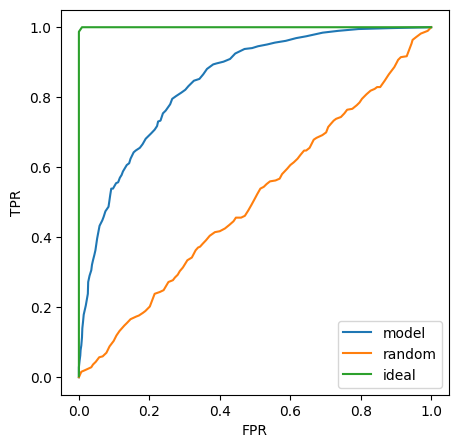

In [51]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label="model")
plt.plot(df_rand.fpr, df_rand.tpr, label="random")
plt.plot(df_ideal.fpr, df_ideal.tpr, label="ideal")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

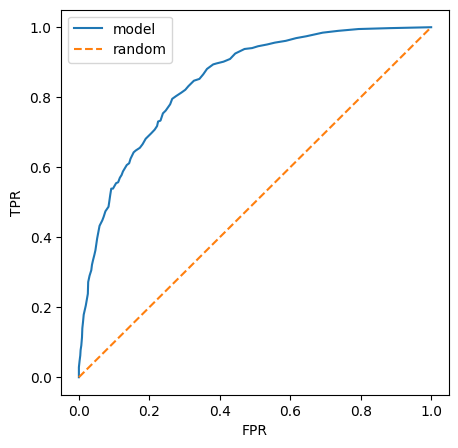

In [52]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label="model")
plt.plot([0, 1], [0, 1], label="random", linestyle='--')
# plt.plot(df_rand.fpr, df_rand.tpr, label="random")
# plt.plot(df_ideal.fpr, df_ideal.tpr, label="ideal")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [53]:
from sklearn.metrics import roc_curve

In [54]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

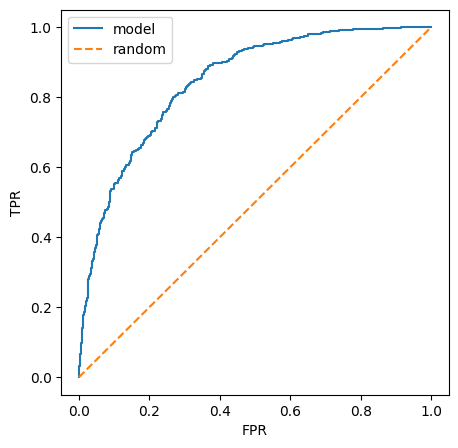

In [55]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label="model")
plt.plot([0, 1], [0, 1], label="random", linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

## ROC AUC
- Area under ROC curve - userful metric.
- Interpretation of AUC

In [56]:
from sklearn.metrics import auc

In [57]:
auc(fpr, tpr)

0.8445038720820102

In [58]:
# Actual model
auc(df_scores.fpr, df_scores.tpr)

0.8443696534119398

In [59]:
# Ideal model
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [60]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8445038720820102

In [61]:
from sklearn.metrics import roc_auc_score

In [62]:
roc_auc_score(y_val, y_pred)

0.8445038720820102

In [63]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [64]:
import random

In [65]:
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success += 1


success / n

0.84336

In [66]:
n = 10000
np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

In [67]:
(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.8431)

## 4.7 Cross-Validation.
- Evaluating the same model on different subsets of data.
- Getting the average prediction and the spread within predictions.

In [68]:
def train(df, y_train, C=1.0):
    dicts = df[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)

    return dv, model

In [69]:
dv, model = train(df_train, y_train, C=0.001)

In [70]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [71]:
y_pred = predict(df_val, dv, model)

In [72]:
from sklearn.model_selection import KFold

In [73]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [74]:
!pip install tqdm


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [75]:
from tqdm.auto import tqdm

In [76]:
n_splits = 5
for C in [0.001, 0.01, 0.1, 0.5, 1.0, 5, 10.0]:
    scores = []

    for train_idx, val_idx in tqdm(kfold.split(df_full_train), total=n_splits):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        score = roc_auc_score(y_val, y_pred)
        scores.append(score)

    print(f"C={C}: {np.mean(scores):.3f} +- {np.std(scores):.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

C=0.001: 0.826 +- 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.01: 0.841 +- 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.1: 0.842 +- 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.5: 0.843 +- 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

C=1.0: 0.842 +- 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

C=5: 0.842 +- 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

C=10.0: 0.842 +- 0.012


In [77]:
scores

[0.8500548637946663,
 0.8424350247524751,
 0.8584455924123382,
 0.8326804378240474,
 0.8245812655086849,
 0.8411588411588412,
 0.8431618365353306,
 0.8255613535736874,
 0.8457388468949163,
 0.860542502773016]

In [78]:
np.mean(scores), np.std(scores)

(np.float64(0.8424360565228003), np.float64(0.011636075706394298))

In [79]:
len(train_idx), len(val_idx), len(df_full_train)

(5071, 563, 5634)

In [80]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [81]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_val, dv, model)

auc = roc_auc_score(y_val, y_pred)
auc

0.866239790259151

## 4.8 Summary
- Metric - Single number that describes the perfomance of a model
- Accuracy - Fratcion of correct answers; sometimes misleading.
- Precision and recall are less misleading when we have class inbalance.
- ROC Curve - a way to evaluate the perfomance at all thresholds; okay to use with imbalance.
- K-Fold CV - more reliable estimate for performance (mean + stf)

## 4.9 Explore more
- Check the precision and recall of the dummy classifier that always predict "FALSE"
- F1 score = 2 P R / (P + R)
- Evaluate precision and recall at different thresholds, plot P vs R - this way you'll get the precision/recall curve (similar to ROC curve)
- Area under the PR curve is also a useful metric
### Other projects
- Calculate the metrics for the suggested datasets from the previous week